In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation cofusion
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
df1 = pd.read_csv('Meander_HandPD.csv')

In [ ]:
df1.dataframeName = 'Meander_HandPD.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 368 rows and 16 columns


# Ploting Functions

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
df1.head(5)

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,0068-1.jpg,1,1,F,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,F,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,M,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


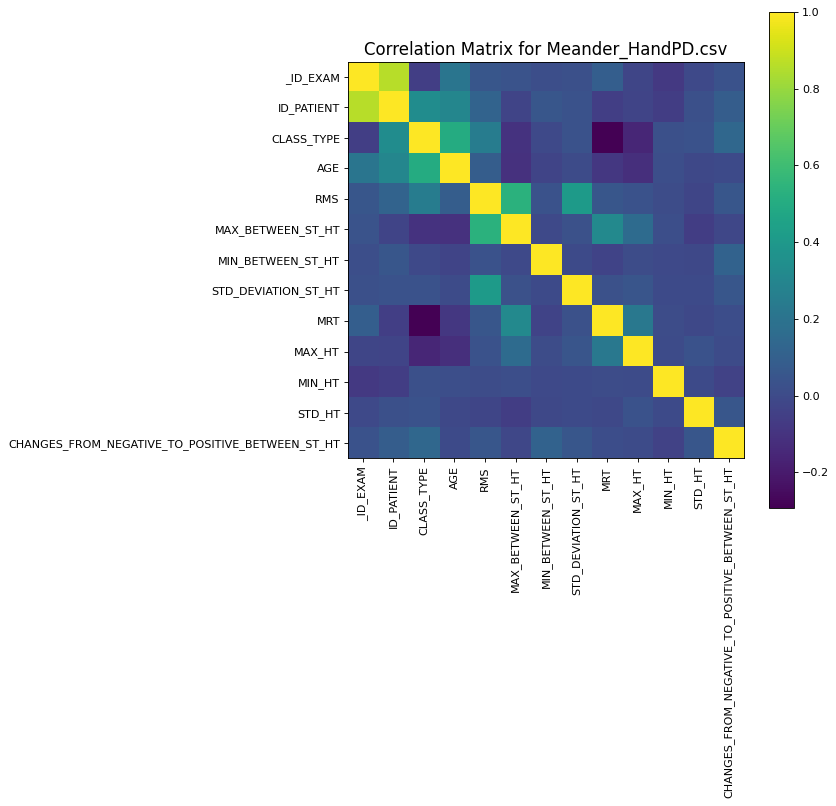

In [ ]:
plotCorrelationMatrix(df1, 8)

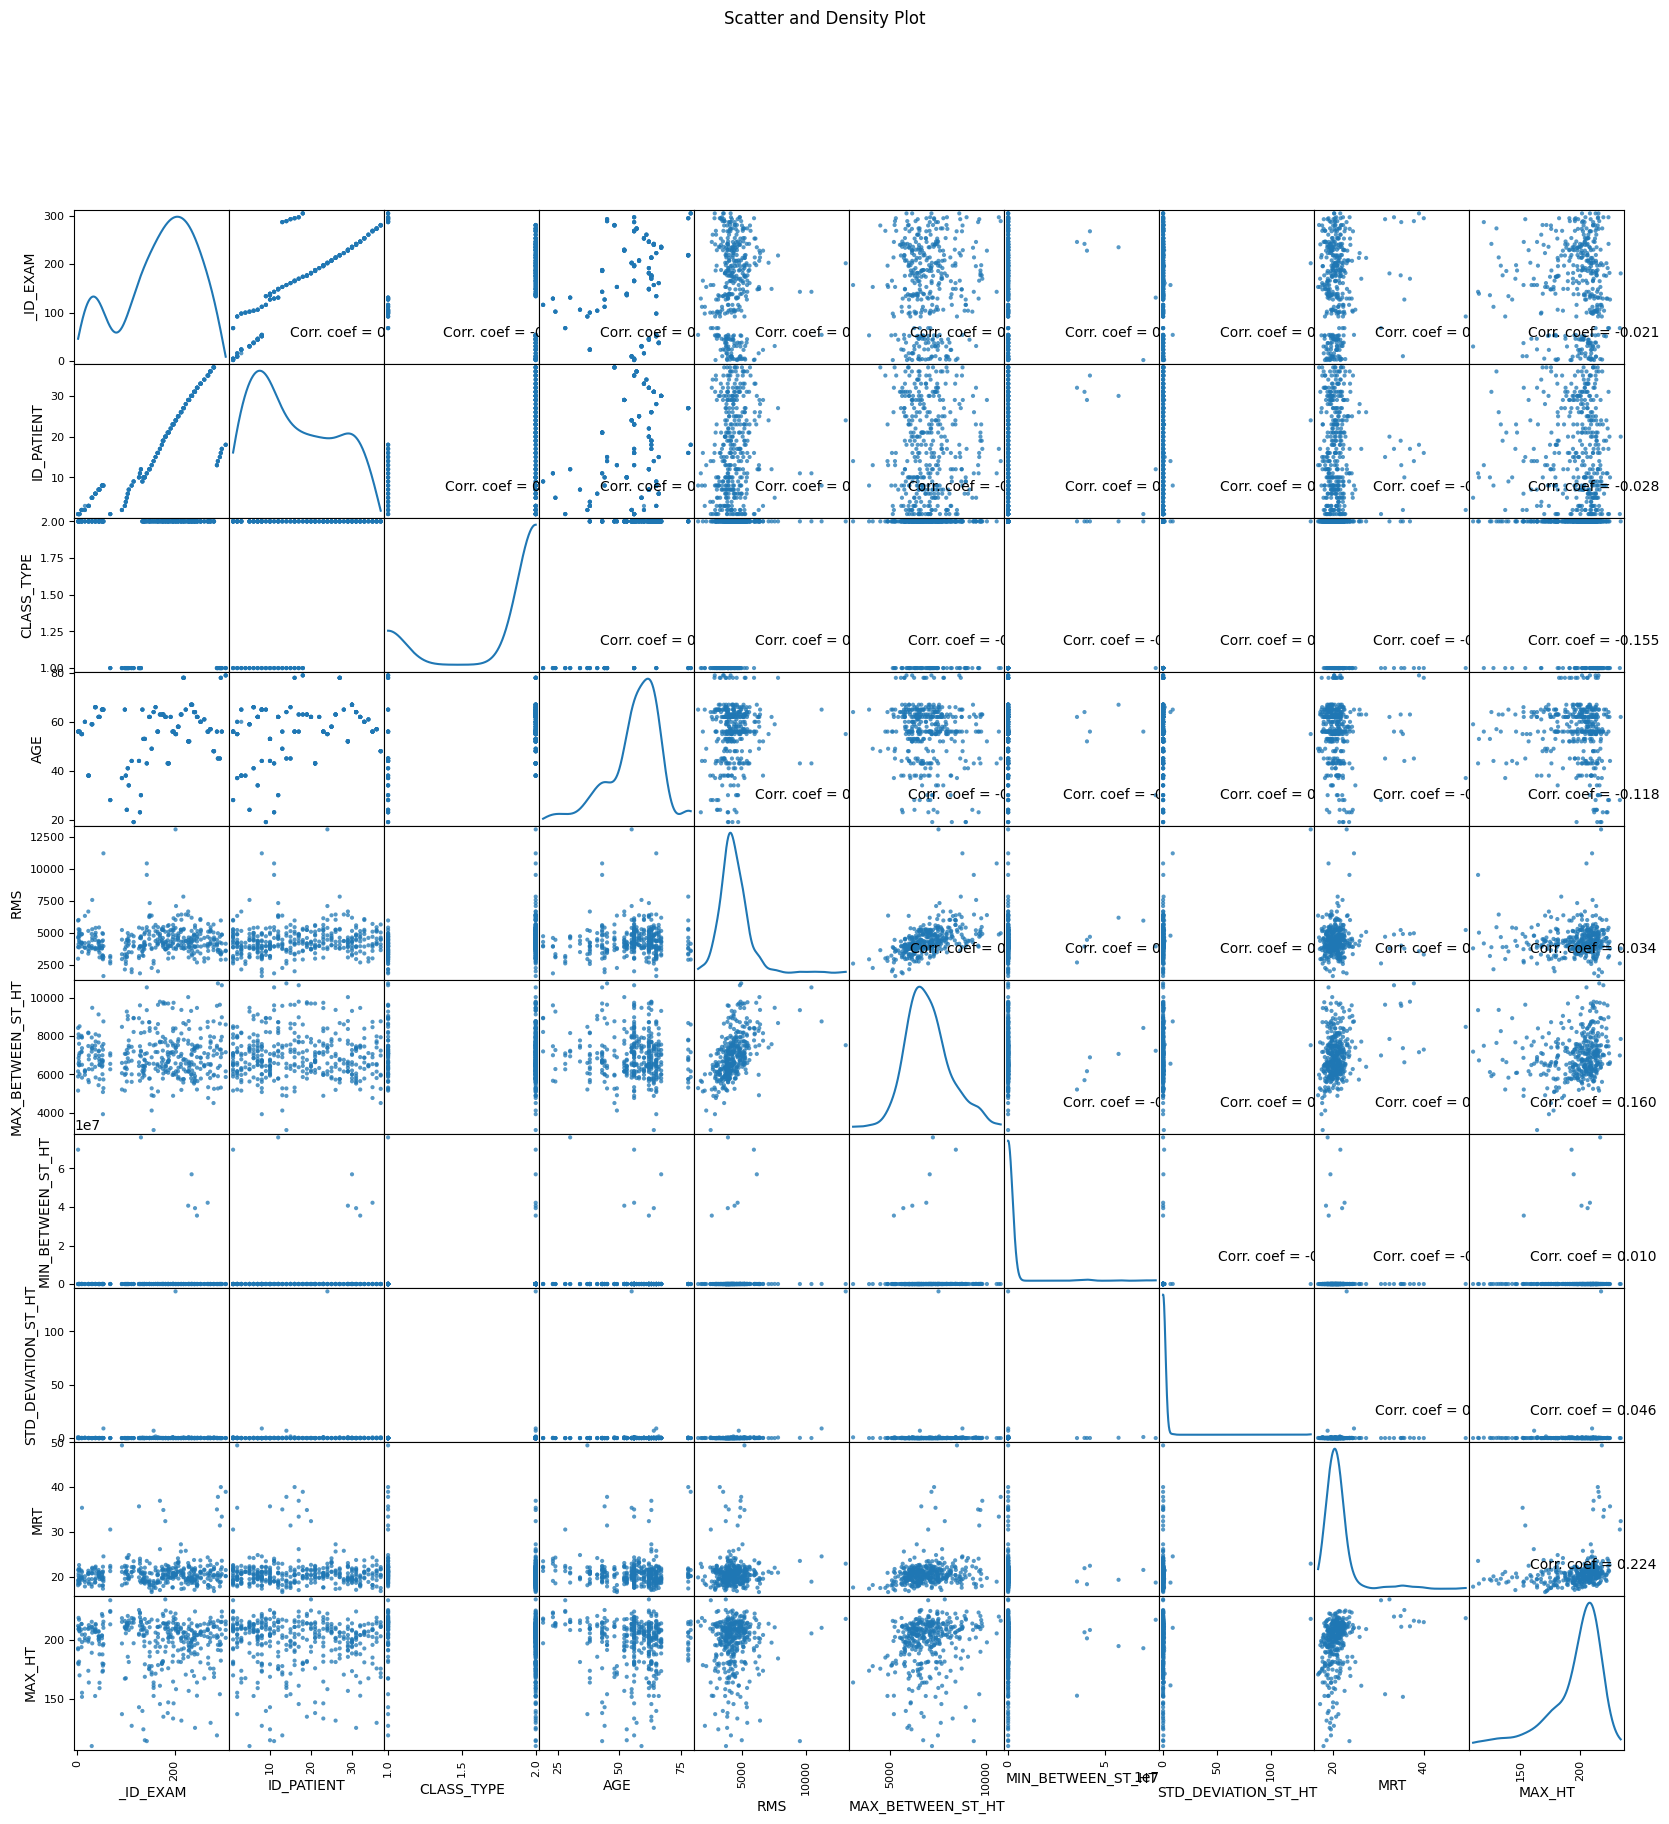

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
df1.head(5)

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,0068-1.jpg,1,1,F,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,F,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,M,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [ ]:


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   _ID_EXAM                                         368 non-null    int64  
 1   IMAGE_NAME                                       368 non-null    object 
 2   ID_PATIENT                                       368 non-null    int64  
 3   CLASS_TYPE                                       368 non-null    int64  
 4   GENDER                                           368 non-null    object 
 5   RIGH/LEFT-HANDED                                 368 non-null    object 
 6   AGE                                              368 non-null    int64  
 7   RMS                                              368 non-null    float64
 8   MAX_BETWEEN_ST_HT                                368 non-null    float64
 9   MIN_BETWEEN_ST_HT               

In [ ]:
df1['GENDER'].value_counts(), (df1['GENDER'].value_counts()*100)/len(df1)

(M    224
 F    144
 Name: GENDER, dtype: int64,
 M    60.869565
 F    39.130435
 Name: GENDER, dtype: float64)

In [ ]:
# Quantidade e idade dos indivíduos por sexo, indivíduos femininos apresentam idades inferiores aos indivíduos do sexo masculino.

agebygender = df1.groupby(by=df1['AGE']).GENDER.value_counts()
agebygender

AGE  GENDER
19   F          4
23   F          4
24   M          4
28   F          4
30   M          4
34   F          4
37   M          4
38   M          8
     F          4
41   F          4
43   M         16
44   F          8
45   F          8
48   F          8
49   M          4
52   M         12
53   F         12
55   F          8
     M          8
56   M         28
     F         24
57   M          8
58   F          8
59   M          8
60   M         12
61   F          4
62   M         24
     F         16
63   F         16
     M          8
64   M         16
65   M         20
     F          8
66   M         12
67   M         12
78   M         12
79   M          4
Name: GENDER, dtype: int64

<Axes: title={'center': 'AGE'}, xlabel='GENDER'>

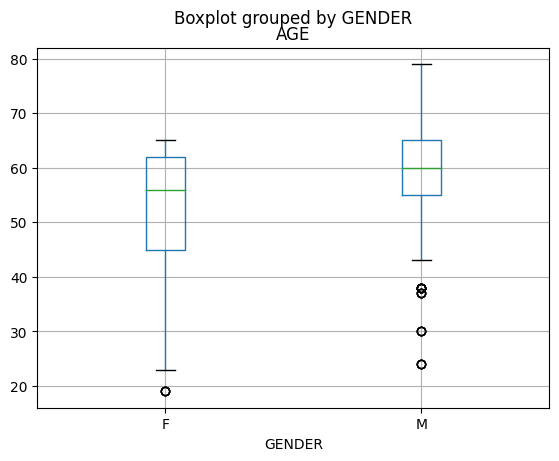

In [ ]:
df1.boxplot(column='AGE', by='GENDER')

In [ ]:
# Alterando as features Sex de valores categóricos para discretos.

def change_feature_sex(value):
    if value == 'F':
        return 1
    else:
        return 0

df1['GENDER'] = df1['GENDER'].map(change_feature_sex)
df1.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,0068-1.jpg,1,1,1,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,1,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,1,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,1,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,0,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [ ]:
df1['RIGH/LEFT-HANDED'].value_counts(), (df1['RIGH/LEFT-HANDED'].value_counts()*100)/len(df1)

(R    344
 L     24
 Name: RIGH/LEFT-HANDED, dtype: int64,
 R    93.478261
 L     6.521739
 Name: RIGH/LEFT-HANDED, dtype: float64)

In [ ]:
def change_feature_hand(value):
    if value == 'L':
        return 1
    else:
        return 0

df1['RIGH/LEFT-HANDED'] = df1['RIGH/LEFT-HANDED'].map(change_feature_hand)
df1.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,0068-1.jpg,1,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,0,0,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [ ]:


df1 = df1.drop(columns=['IMAGE_NAME'])
df1.head()

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,1,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,1,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,1,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,1,1,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,2,1,0,0,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [ ]:


df1.corr()

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
_ID_EXAM,1.000000,0.859211,-0.051757,0.085413,0.067455,0.207686,0.050986,0.037989,0.019199,0.021615,0.091946,-0.020937,-0.076570,-0.006835,0.032534
ID_PATIENT,0.859211,1.000000,0.337066,-0.061596,0.090116,0.298666,0.118382,-0.027998,0.054202,0.032114,-0.052930,-0.028492,-0.057427,0.020465,0.086403
CLASS_TYPE,-0.051757,0.337066,1.000000,-0.278271,-0.091672,0.503088,0.248940,-0.105038,-0.005058,0.031723,-0.292713,-0.155282,0.023940,0.035167,0.138796
GENDER,0.085413,-0.061596,-0.278271,1.000000,0.149030,-0.253879,-0.168120,0.070156,-0.080032,-0.046763,0.094173,-0.006359,-0.042177,0.018892,0.060351
RIGH/LEFT-HANDED,0.067455,0.090116,-0.091672,0.149030,1.000000,-0.134308,-0.004169,-0.012563,-0.035424,-0.016216,0.077746,0.115345,-0.012941,-0.019002,-0.056254
AGE,0.207686,0.298666,0.503088,-0.253879,-0.134308,1.000000,0.086815,-0.108482,-0.026918,0.003912,-0.084411,-0.118283,0.015961,-0.011668,-0.000118
RMS,0.050986,0.118382,0.248940,-0.168120,-0.004169,0.086815,1.000000,0.531427,0.034742,0.409334,0.054652,0.034231,0.009858,-0.023239,0.055552
MAX_BETWEEN_ST_HT,0.037989,-0.027998,-0.105038,0.070156,-0.012563,-0.108482,0.531427,1.000000,-0.008664,0.029279,0.314566,0.160006,0.017327,-0.059332,-0.019129
MIN_BETWEEN_ST_HT,0.019199,0.054202,-0.005058,-0.080032,-0.035424,-0.026918,0.034742,-0.008664,1.000000,-0.004112,-0.032077,0.009912,-0.007151,-0.010144,0.114620
STD_DEVIATION_ST_HT,0.021615,0.032114,0.031723,-0.046763,-0.016216,0.003912,0.409334,0.029279,-0.004112,1.000000,0.030162,0.045791,-0.003561,-0.003874,0.051443


In [ ]:
df1.head(3)

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,1,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,1,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,1,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287


In [ ]:
cl=pd.get_dummies(df1['CLASS_TYPE'],drop_first=True)

In [ ]:
df1['class']=cl

In [ ]:
df1.drop('CLASS_TYPE',axis=1,inplace=True)

In [ ]:
df1

,_ID_EXAM,ID_PATIENT,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT,class
0,68,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138,0
1,68,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438,0
2,68,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287,0
3,68,1,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084,0
4,92,2,0,0,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,280,37,1,0,48,5015.125488,6987.536133,51100.48438,0.001233,19.951805,214.707642,0.191509,702.567322,0.228324,1
364,281,37,1,0,48,4437.803711,5241.522949,32731.33789,0.812112,21.759117,210.824036,0.097694,673.698547,0.241983,1
365,281,37,1,0,48,4621.904297,5978.478516,36743.95313,0.029844,16.832781,171.790512,0.010101,533.626526,0.202381,1
366,281,37,1,0,48,4488.641113,7941.853027,70667.57031,0.009456,20.473293,168.538498,0.086826,732.948120,0.229851,1


In [ ]:


X = df1.drop('class',axis=1)
y = df1['class']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
363    1
364    1
365    1
366    1
367    1
Name: class, Length: 368, dtype: uint8

In [ ]:
X

,_ID_EXAM,ID_PATIENT,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,1,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,2,0,0,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,280,37,1,0,48,5015.125488,6987.536133,51100.48438,0.001233,19.951805,214.707642,0.191509,702.567322,0.228324
364,281,37,1,0,48,4437.803711,5241.522949,32731.33789,0.812112,21.759117,210.824036,0.097694,673.698547,0.241983
365,281,37,1,0,48,4621.904297,5978.478516,36743.95313,0.029844,16.832781,171.790512,0.010101,533.626526,0.202381
366,281,37,1,0,48,4488.641113,7941.853027,70667.57031,0.009456,20.473293,168.538498,0.086826,732.948120,0.229851


# Random-Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 14), (37, 14), (331,), (37,))

In [ ]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
input_data=(68,	1,	1	,1	,28	,3176.216064	,7098.378906	,46569.03516,	0.000672	,21.280848	,224.197754	,0.156795,	802.821106	,0.216138)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
pred=model.predict(input_data_re)
print(pred)
if(pred[0]==0):
  print("negative")
else:
   print("positive")

[0]
negative


In [ ]:
input_data=(280	,37,	1,	0,	48,	5015.125488	,6987.536133	,51100.48438,	0.001233	,19.951805	,214.707642,	0.191509	,702.567322	,0.228324	)
input_data_np=np.asarray(input_data)
input_data_re=input_data_np.reshape(1,-1)
pred=model.predict(input_data_re)
print(pred)
if(pred[0]==0):
  print("negative")
else:
   print("positive")

[1]
positive


# Results

In [ ]:
print('________________________________________________________________________________________\n')
print('Classification Report :')
print('________________________________________________________________________________________\n')
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print('________________________________________________________________________________________\n')
print("Confusion Matrix :")
print('________________________________________________________________________________________\n')
print(confusion_matrix(y_test,pred))
print('________________________________________________________________________________________\n')
print('Accuracy Score :',accuracy_score(y_test,pred)*100,'%')
print('________________________________________________________________________________________\n')

________________________________________________________________________________________

Classification Report :
________________________________________________________________________________________

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        27

    accuracy                           0.97        37
   macro avg       0.98      0.95      0.96        37
weighted avg       0.97      0.97      0.97        37

________________________________________________________________________________________

Confusion Matrix :
________________________________________________________________________________________

[[ 9  1]
 [ 0 27]]
________________________________________________________________________________________

Accuracy Score : 97.2972972972973 %
________________________________________________________________________________________



# Confusion matrix

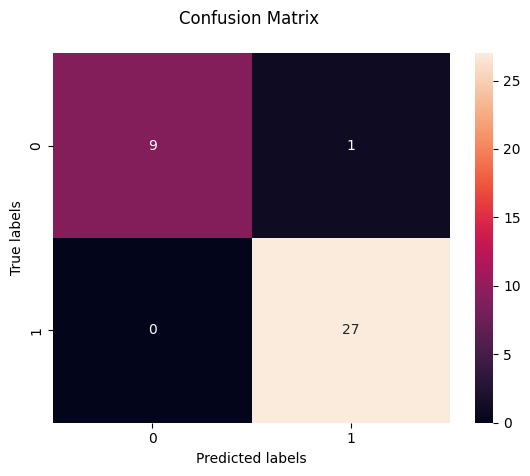

In [ ]:
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix \n');

In [ ]:
df1

,_ID_EXAM,ID_PATIENT,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT,class
0,68,1,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138,0
1,68,1,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438,0
2,68,1,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287,0
3,68,1,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084,0
4,92,2,0,0,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,280,37,1,0,48,5015.125488,6987.536133,51100.48438,0.001233,19.951805,214.707642,0.191509,702.567322,0.228324,1
364,281,37,1,0,48,4437.803711,5241.522949,32731.33789,0.812112,21.759117,210.824036,0.097694,673.698547,0.241983,1
365,281,37,1,0,48,4621.904297,5978.478516,36743.95313,0.029844,16.832781,171.790512,0.010101,533.626526,0.202381,1
366,281,37,1,0,48,4488.641113,7941.853027,70667.57031,0.009456,20.473293,168.538498,0.086826,732.948120,0.229851,1


In [ ]:
!pip3 install shap

In [ ]:
import shap

shap.initjs()

In [ ]:
view = shap.TreeExplainer(model)
shap_values = view.shap_values(X_train)

In [ ]:
shap_values[1].shape

(331, 14)

In [ ]:
shap.force_plot(view.expected_value[1], shap_values[1], X_train)

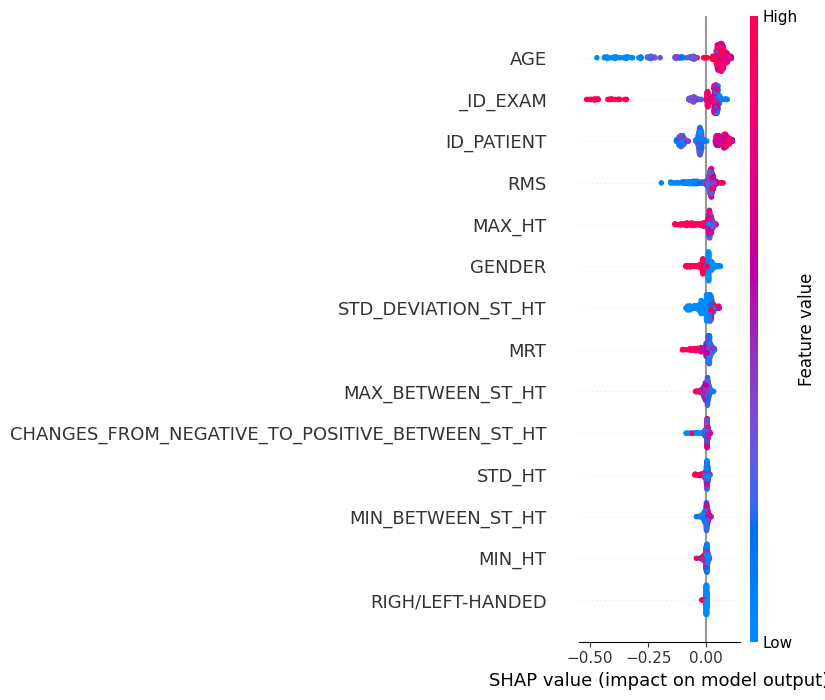

In [ ]:
shap.summary_plot(shap_values[1], X_train)

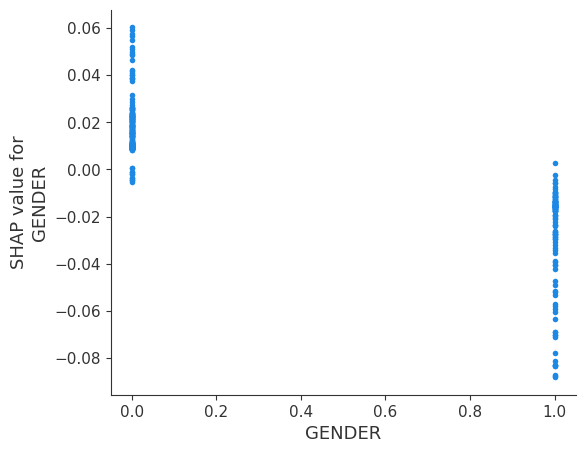

In [ ]:
shap.dependence_plot('GENDER', shap_values[1], X_train, interaction_index=None)

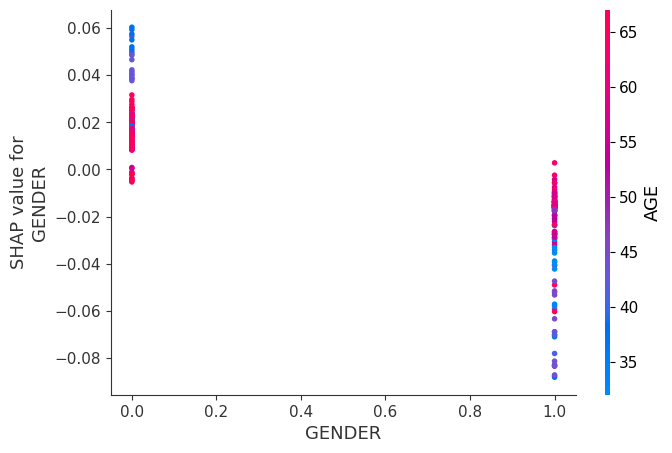

In [ ]:
shap.dependence_plot('GENDER', shap_values[1], X_train, interaction_index='AGE')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_X= StandardScaler()
X_train= st_X.fit_transform(X_train)
X_test= st_X.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 9,  1],
       [ 2, 25]])

In [ ]:
print('________________________________________________________________________________________\n')
print('Classification Report :')
print('________________________________________________________________________________________\n')
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print('________________________________________________________________________________________\n')
print("Confusion Matrix :")
print('________________________________________________________________________________________\n')
print(confusion_matrix(y_test,pred))
print('________________________________________________________________________________________\n')
print('Accuracy Score :',accuracy_score(y_test,pred)*100,'%')
print('________________________________________________________________________________________\n')

________________________________________________________________________________________

Classification Report :
________________________________________________________________________________________

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        10
           1       1.00      0.11      0.20        27

    accuracy                           0.35        37
   macro avg       0.65      0.56      0.33        37
weighted avg       0.81      0.35      0.27        37

________________________________________________________________________________________

Confusion Matrix :
________________________________________________________________________________________

[[10  0]
 [24  3]]
________________________________________________________________________________________

Accuracy Score : 35.13513513513514 %
________________________________________________________________________________________



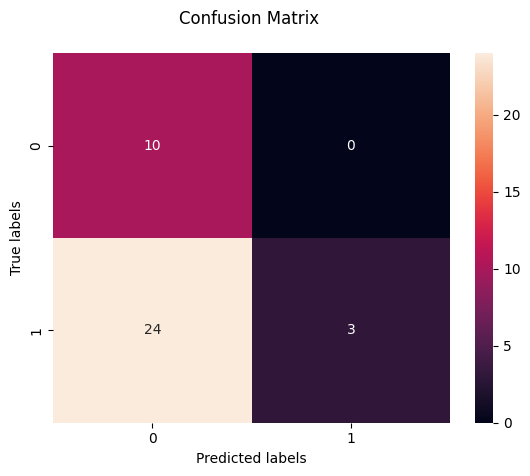

In [ ]:
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix \n');

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

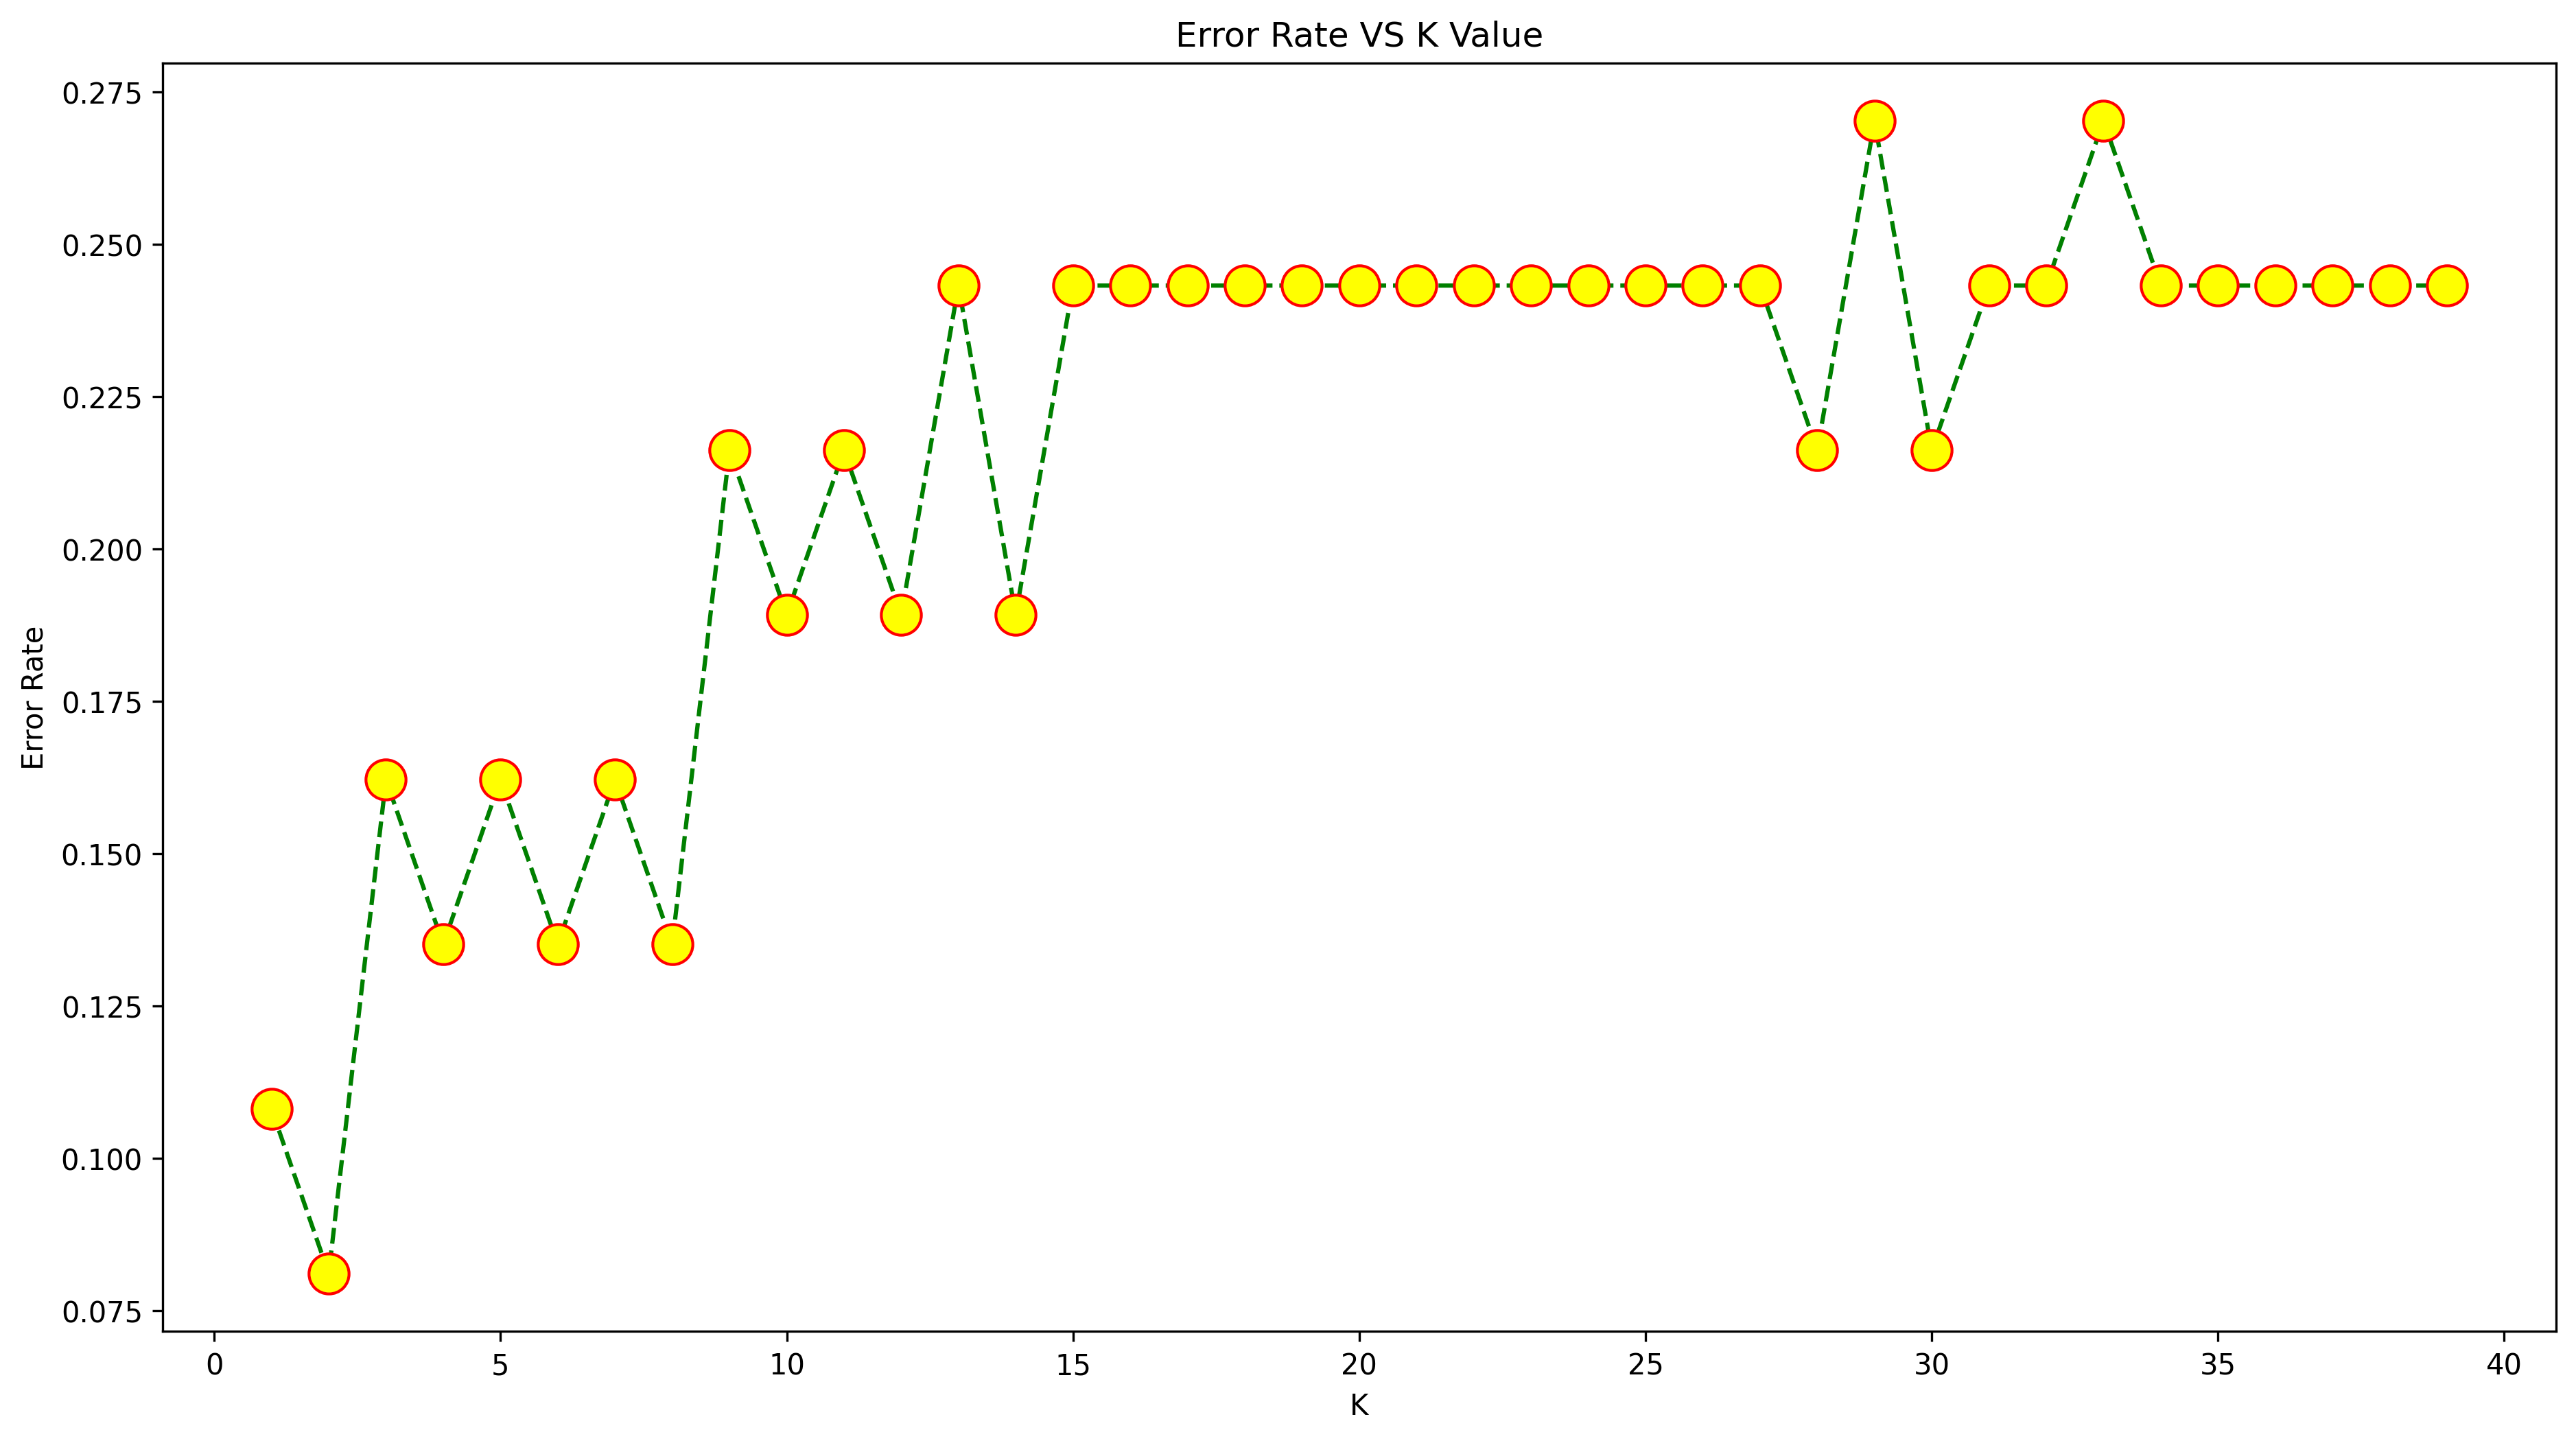

In [ ]:
plt.figure(figsize=(15,8),dpi=300)
plt.plot(range(1,40),error_rate,marker='o',color='green'
         ,ls='--',markerfacecolor='yellow',markeredgecolor='red',markersize=14)
plt.title("Error Rate VS K Value")
plt.xlabel('K')
plt.ylabel('Error Rate');

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [ ]:
print('________________________________________________________________________________________\n')
print("Classification report :\n")
print('________________________________________________________________________________________\n')
print(classification_report(y_test,pred))
print('\n')
print('________________________________________________________________________________________\n')
print("Confusion Matrix :\n")
print('________________________________________________________________________________________\n')
print(confusion_matrix(y_test,pred))
print('\n')

print('________________________________________________________________________________________\n')
print("Accuracy Score :\n")
print('________________________________________________________________________________________\n')
print(accuracy_score(y_test,pred)*100,'%')

________________________________________________________________________________________

Classification report :

________________________________________________________________________________________

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.94        27

    accuracy                           0.92        37
   macro avg       0.89      0.91      0.90        37
weighted avg       0.92      0.92      0.92        37



________________________________________________________________________________________

Confusion Matrix :

________________________________________________________________________________________

[[ 9  1]
 [ 2 25]]


________________________________________________________________________________________

Accuracy Score :

________________________________________________________________________________________

91.8918918918919 %


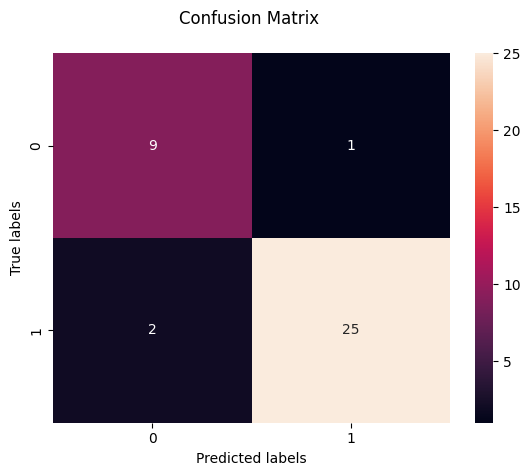

In [ ]:
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix \n');

In [ ]:
B= accuracy_score (y_test, pred)*100

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df1.drop('class',axis =1)
y=df1['class']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm=LogisticRegression()

In [ ]:
lm.fit(X_train,y_train)

LogisticRegression()

In [ ]:
perdictions=lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,perdictions))

[[ 1  2]
 [ 1 33]]


In [ ]:
print(classification_report(y_test,perdictions))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.94      0.97      0.96        34

    accuracy                           0.92        37
   macro avg       0.72      0.65      0.68        37
weighted avg       0.91      0.92      0.91        37



In [ ]:
print("Accuracy Score :\n")
print(accuracy_score(y_test,pred)*100,'%')

Accuracy Score :

72.97297297297297 %


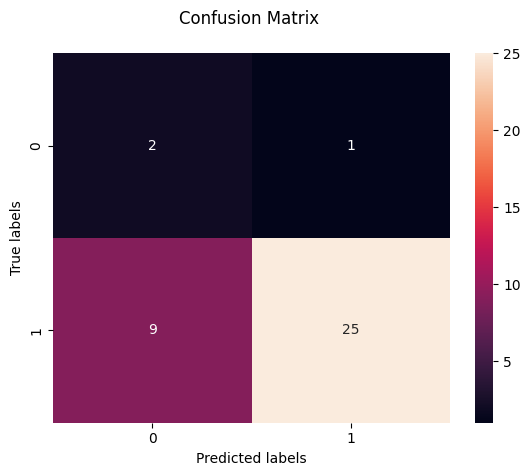

In [ ]:
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix \n');

In [ ]:
C= accuracy_score (y_test, pred)*100

In [ ]:
l1=[C,A,B]

In [ ]:
Df=pd.DataFrame(l1,index=['LogisticReg','RandomForest','KNN'],columns=['models accuracy'])

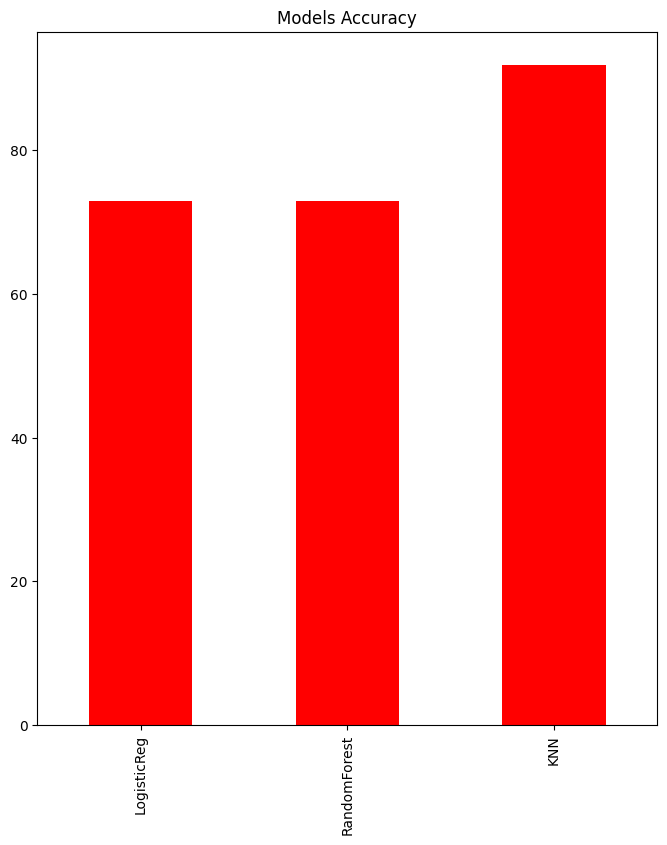

In [ ]:
plt.figure(figsize=(8,9))
plt.title('Models Accuracy')
Df['models accuracy'].plot(kind='bar',color='red');
